<a href="https://colab.research.google.com/github/vnsh69/machine-learning-practice/blob/main/cnn_pizza%26steak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-11-03 14:46:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.181.207, 142.251.183.207, 173.194.193.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.181.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   251MB/s    in 0.4s    

2024-11-03 14:46:46 (251 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

1. preprocessing the data

In [4]:
train = "pizza_steak/train/"
test = "pizza_steak/test/"

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(rescale=1/255)
test_data = ImageDataGenerator(rescale=1/255)

In [6]:
train_data = train_data.flow_from_directory(train,target_size=(224,224),batch_size=32,class_mode="binary")
test_data = test_data.flow_from_directory(test,target_size=(224,224),batch_size=32,class_mode="binary")


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [7]:
train_data[0]

(array([[[[0.7411765 , 0.6431373 , 0.62352943],
          [0.74509805, 0.6666667 , 0.6392157 ],
          [0.7686275 , 0.69803923, 0.68235296],
          ...,
          [0.07058824, 0.02745098, 0.01960784],
          [0.0627451 , 0.03529412, 0.01176471],
          [0.0509804 , 0.03137255, 0.00784314]],
 
         [[0.7568628 , 0.68235296, 0.65882355],
          [0.8117648 , 0.7411765 , 0.7254902 ],
          [0.7960785 , 0.7372549 , 0.7254902 ],
          ...,
          [0.07843138, 0.03529412, 0.02745098],
          [0.07058824, 0.03529412, 0.01568628],
          [0.06666667, 0.03921569, 0.01568628]],
 
         [[0.78823537, 0.74509805, 0.7372549 ],
          [0.7137255 , 0.67058825, 0.6627451 ],
          [0.45882356, 0.41960788, 0.4156863 ],
          ...,
          [0.08627451, 0.03137255, 0.02745098],
          [0.07450981, 0.03137255, 0.01568628],
          [0.06666667, 0.02352941, 0.00784314]],
 
         ...,
 
         [[0.9490197 , 0.9490197 , 0.9490197 ],
          [0.98431

2. train model

In [8]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential([
    Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        padding="valid",
        input_shape=(224,224,3)
    ),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [10]:
model.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 22s 439ms/step - loss: 1.5588 - accuracy: 0.5853 - val_loss: 0.5760 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 20s 429ms/step - loss: 0.4834 - accuracy: 0.7780 - val_loss: 0.4207 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 20s 426ms/step - loss: 0.3323 - accuracy: 0.8600 - val_loss: 0.4533 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 20s 428ms/step - loss: 0.1965 - accuracy: 0.9387 - val_loss: 0.4572 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 20s 423ms/step - loss: 0.0835 - accuracy: 0.9793 - val_loss: 0.5554 - val_accuracy: 0.7860


**note:-** model is getting overfitted , i.e. model is getting well train on training data

3. lets do data augmentation and train with complex model

In [13]:
train_data_augment = ImageDataGenerator(rescale=1/255.,
                                        rotation_range=20,
                                        zoom_range=0.2,
                                        shear_range=0.2,
                                        horizontal_flip=True,
                                        )
test_data_augment = ImageDataGenerator(rescale=1/255)

In [16]:
train_data_augmented = train_data_augment.flow_from_directory(train,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)

test_data_augmented = test_data_augment.flow_from_directory(test,
                                                              target_size=(224, 224),
                                                              batch_size=32,
                                                              class_mode='binary',
                                                              shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [19]:
model_complex = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(16, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_complex.compile(loss='binary_crossentropy',
                optimizer=Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model
history_2 = model_complex.fit(train_data_augmented, # now the augmented data is shuffled
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data_augmented,
                        validation_steps=len(test_data_augmented))

Epoch 1/10
47/47 [==============================] - 22s 449ms/step - loss: 0.6316 - accuracy: 0.6300 - val_loss: 0.5558 - val_accuracy: 0.6840
Epoch 2/10
47/47 [==============================] - 21s 435ms/step - loss: 0.4971 - accuracy: 0.7707 - val_loss: 0.3926 - val_accuracy: 0.8100
Epoch 3/10
47/47 [==============================] - 20s 425ms/step - loss: 0.4410 - accuracy: 0.7967 - val_loss: 0.3468 - val_accuracy: 0.8640
Epoch 4/10
47/47 [==============================] - 20s 430ms/step - loss: 0.4379 - accuracy: 0.8013 - val_loss: 0.3510 - val_accuracy: 0.8440
Epoch 5/10
47/47 [==============================] - 21s 445ms/step - loss: 0.4247 - accuracy: 0.8100 - val_loss: 0.3188 - val_accuracy: 0.8740
Epoch 6/10
47/47 [==============================] - 20s 431ms/step - loss: 0.4064 - accuracy: 0.8207 - val_loss: 0.3703 - val_accuracy: 0.8400
Epoch 7/10
47/47 [==============================] - 21s 433ms/step - loss: 0.4032 - accuracy: 0.8273 - val_loss: 0.3527 - val_accuracy: 0.8680

our model's accuracy has increased exponentially just by augmenting the data

https://unsplash.com/images/food/pizza

In [24]:
import urllib.request

url = "https://media.istockphoto.com/id/1442417585/photo/person-getting-a-piece-of-cheesy-pepperoni-pizza.jpg?s=1024x1024&w=is&k=20&c=faq73viCFGvfpKxcBuHcOI8kyT99B-p-jScipke-VuQ="
urllib.request.urlretrieve(url, "test_image.jpg")

('test_image.jpg', <http.client.HTTPMessage at 0x79de34789030>)

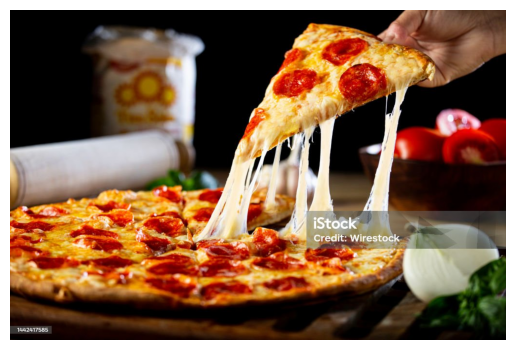

In [25]:
img = mpimg.imread("test_image.jpg")
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [29]:
from PIL import Image
img = Image.open("test_image.jpg/")
img = np.array(img.resize((224, 224)))
img = img / 255.0
img = np.expand_dims(img, axis=0)

In [30]:
predictions = model_complex.predict(img)
predicted_class = np.argmax(predictions)
print(f"Predicted Class: {predicted_class}")

1/1 [==============================] - 0s 201ms/step
Predicted Class: 0


successfully predicted on the new test image